<a href="https://colab.research.google.com/github/athiniotim/Final_Essay_Forest_Fires/blob/main/forest_fires_kathimerini_climate_change_Michaela_Athinioti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Final Essay ΕΔΔΕ.2 Αθηνιώτη Μιχαέλα/clean csv/forest_fires_kathimerini_articles_csv.csv')
df

,article_url,title,date,time,section,author,excerpt,text_body,feat_img_link,feat_img_cation
0,https://www.kathimerini.gr/world/563396869/oie...,"ΟΗΕ: Το 2024, η κλιματική αλλαγή προκάλεσε ακρ...",2024-12-30,23:42:00,Κόσμος,Newsroom,Σύμφωνα με τον Παγκόσμιο Μετεωρολογικό Οργανισ...,Η κλιματική αλλαγή προκάλεσε ακραίες μετεωρολο...,https://www.kathimerini.gr/wp-content/uploads/...,Καλιφόρνια: Προειδοποίηση στους κατοίκους να μ...
1,https://www.kathimerini.gr/life/environment/56...,NaN,NaN,NaN,NaN,NaN,NaN,Από το μικρό γαλλικό αρχιπέλαγος της Μαγιότ έω...,NaN,NaN
2,https://www.kathimerini.gr/life/environment/56...,NaN,NaN,NaN,NaN,NaN,NaN,"Δύσκολες κλιματολογικές συνθήκες, νέες προκλήσ...",NaN,NaN
3,https://www.kathimerini.gr/world/563358376/por...,Πορτογαλία και Ισπανία έζησαν τον πιο ζεστό Νο...,2024-12-05,22:11:00,Κόσμος,Newsroom,Η μέση θερμοκρασία του Νοεμβρίου στην Πορτογαλ...,Υψηλότατες για την εποχή θερμοκρασίες καταγράφ...,https://www.kathimerini.gr/wp-content/uploads/...,Shutterstock
4,https://www.kathimerini.gr/society/563356729/d...,Δύο νέες πλατφόρμες για την ανάλυση του κλίματος,2024-12-05,23:34:00,Κοινωνία,Γιάννης Ελαφρός,Δύο νέους ψηφιακούς κόμβους ανάλυσης της ατμόσ...,"Δύο νέα ισχυρά εργαλεία καταγραφής, ανάλυσης κ...",https://www.kathimerini.gr/wp-content/uploads/...,Φωτ. INTIME/ ΧΑΛΚΙΟΠΟΥΛΟΣ ΝΙΚΟΣ.
...,...,...,...,...,...,...,...,...,...,...
643,https://www.kathimerini.gr/world/562221718/kal...,Καλιφόρνια: Τουλάχιστον 14 νεκροί από τη σφοδρ...,2023-01-10,17:27:40,Κόσμος,Newsroom,«Τα θύματα είναι περισσότερα από εκείνα που σκ...,Σφοδρή βροχόπτωση αναμένεται να πλήξει και πάλ...,https://www.kathimerini.gr/wp-content/uploads/...,Φωτ. REUTERS/ Erica Urech
644,https://www.kathimerini.gr/world/562221523/cop...,Copernicus: Το 2022 ήταν το δεύτερο πιο ζεστό ...,2023-01-10,15:53:30,Κόσμος,Newsroom,«Ζούμε ήδη τις καταστροφικές συνέπειες του θερ...,Το 2022 ήταν το δεύτερο πιο ζεστό έτος που έχε...,https://www.kathimerini.gr/wp-content/uploads/...,Φωτ. AP/ Michael Probst
645,https://www.kathimerini.gr/world/562221112/vra...,Βραζιλία: Οι ρίζες της εξέγερσης των μπολσοναρ...,2023-01-10,12:24:33,Κόσμος,Δημήτρης Αθηνάκης,Τα σχέδια του προέδρου Λούλα για την προστασία...,"Στα πρώτα σχόλιά του μετά την επίθεση, ο νέος ...",https://www.kathimerini.gr/wp-content/uploads/...,Προεκλογική πινακίδα υπέρ του πρώην προέδρου τ...
646,https://www.kathimerini.gr/world/562215640/kal...,"Καλιφόρνια – Κακοκαιρία: Ένα νεκρό παιδί, χιλι...",2023-01-05,18:02:52,Κόσμος,Newsroom,Περισσότερες από 180.000 κατοικίες και επιχειρ...,Ένα παιδί σκοτώθηκε και δεκάδες χιλιάδες άνθρω...,https://www.kathimerini.gr/wp-content/uploads/...,REUTERS/Carlos Barria


In [ ]:
import re
from collections import Counter

df['text'] = df['title'].fillna('') + '' + df['excerpt'].fillna('') + '' + df['text_body'].fillna('')
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df_2023 = df[df['date'].dt.year == 2023]

klimatikh_krish_articles = df_2023[df_2023['text'].fillna('').str.contains("κλιματικ", case=False)]

words_around = []

for text in klimatikh_krish_articles['text']:

    if isinstance(text, str):
        matches = re.finditer(r"(.{0,50}κλιματικ.{0,50})", text, flags=re.IGNORECASE)
        words_around += [m.group(0) for m in matches]

In [ ]:
total_articles = len(df_2023)
klimatik_count = len(klimatikh_krish_articles)
total_articles

361

In [ ]:
percentage = klimatik_count / total_articles * 100

In [ ]:
print(f"Άρθρα με αναφορά στην κλιματική αλλαγή: {klimatik_count} ({percentage:.2f}%) από {total_articles}")

Άρθρα με αναφορά στην κλιματική αλλαγή: 165 (45.71%) από 361


In [ ]:
klimatikh_krish_articles['month'] = klimatikh_krish_articles['date'].dt.to_period('M')

<ipython-input-52-2484829211>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  klimatikh_krish_articles['month'] = klimatikh_krish_articles['date'].dt.to_period('M')


In [ ]:
monthly_counts = klimatikh_krish_articles.groupby('month').size()

In [ ]:
import matplotlib.pyplot as plt

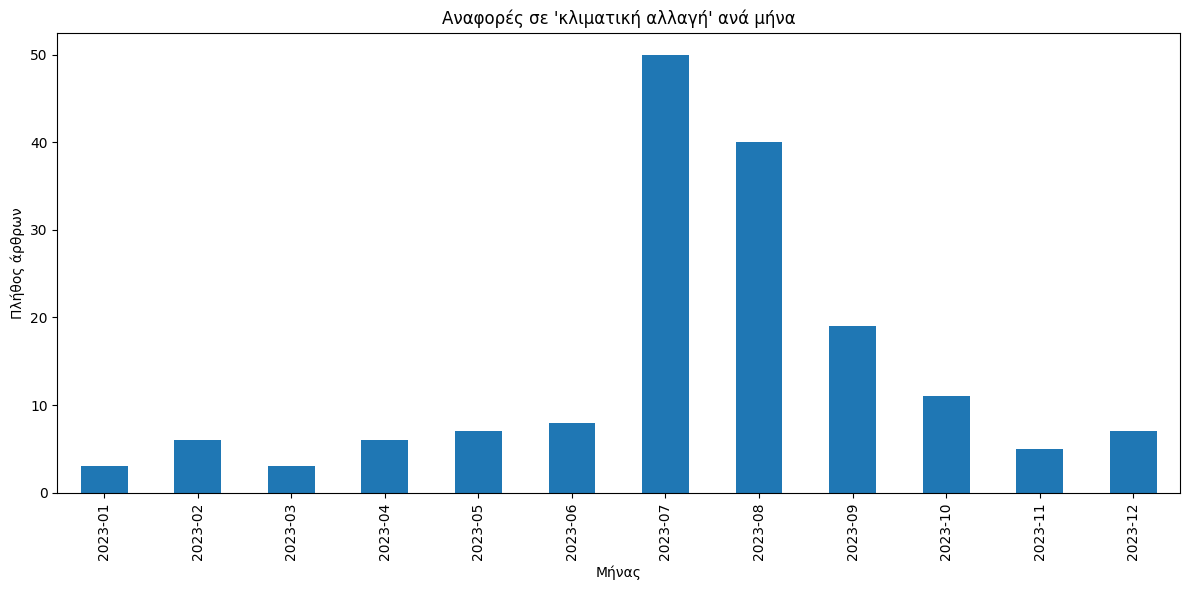

In [ ]:
monthly_counts.plot(kind='bar', figsize=(12, 6), title="Αναφορές σε 'κλιματική αλλαγή' ανά μήνα")
plt.ylabel("Πλήθος άρθρων")
plt.xlabel("Μήνας")
plt.tight_layout()
plt.show()

In [ ]:
for i, phrase in enumerate(words_around[:30], 1):
    print(f"{i}. {phrase}")

1. ι πως η σφοδρότητα των γεγονότων συνδέεται με την κλιματική αλλαγή». Τέλος, την πρώτη 12ετία καταγράφηκαν 84
2. ι πως η σφοδρότητα των γεγονότων συνδέεται με την κλιματική αλλαγή», σημειώνει ο κ. Λαγουβάρδος. Δεδομένου π
3. γεωπολιτικούς κινδύνους και με τις επιπτώσεις της κλιματικής κρίσης να γίνονται ολοένα πιο έκδηλες και αισθη
4. ν προκλήσεων των φυσικών καταστροφών εξαιτίας της κλιματικής αλλαγής. Η πρόσφατη εμπειρία των καταστροφικών 
5. επιπτώσεων της κλιματικής αλλαγής κατέδειξε την ανάγκη πρόβλεψης ειδικών 
6. επενδύσεις για έργα μετριασμού των επιπτώσεων της κλιματικής κρίσης σε μεσομακροπρόθεσμο ορίζοντα. Το αυξημέ
7. ιτέρω διερεύνηση της διασύνδεσης των κινδύνων της κλιματικής αλλαγής με το χρηματοπιστωτικό σύστημα. 10ον Αν
8. Στα 2,2 δισ. ευρώ ετησίως το κόστος της κλιματικής αλλαγής για τη χώραΚίνδυνος ερημοποίησης περίπο
9. ντικές, οικονομικές και κοινωνικές επιπτώσεις της κλιματικής αλλαγής στην Ελλάδα», που παρουσιάζεται σήμερα 
10. πεζας της Ελλάδος Γιάννη Στουρνάρ

In [ ]:
cause_keywords = ["εξαιτίας", "λόγω", "αίτιο", "αιτία", "προκαλεί", "προκάλεσε", "συνέπεια", "σχετίζεται", "ευθύνεται", "οφείλεται", "συνδέεται"]

In [ ]:
all_articles = df_2023["text"].dropna().tolist()

In [ ]:
co_occurrence_count = 0

for article in all_articles:
    article_lower = article.lower()
    if "κλιματική αλλαγή" in article_lower or "κλιματική κρίση" in article_lower:
        if any(kw in article_lower for kw in cause_keywords):
            co_occurrence_count += 1

print(f"Αριθμός άρθρων με αιτιολογική σύνδεση με την κλιματική αλλαγή: {co_occurrence_count} από {len(all_articles)}")

Αριθμός άρθρων με αιτιολογική σύνδεση με την κλιματική αλλαγή: 69 από 361
